In [3]:
import os
if os.name != 'posix':
    %matplotlib ipympl
else:
    %matplotlib notebook
import scipy.constants as sc
from scipy.optimize import fsolve

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse

27019
/media/work/docs/codes/QuCF/scripts-py


In [4]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

colors_ = ["blue", "red", "green", "gray", "black"]

from matplotlib import ticker
cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)



for i in range(30):
    plt.close()

In [5]:
# --- Paths ---
path_data_ = "../QuCF/tests/test_QETU_Gauss/"
pr_name_ = "qetu"

# --- Global parameters ---
nx_ = 10
Nx_ = 1 << nx_

In [6]:
# ------------------------------------
# --- Compute parameters ---
# ------------------------------------
alpha_k0 = - 1.0
alpha_k1 = np.abs(alpha_k0) * Nx_/(Nx_ - 1)

print("nx \t{:d}".format(nx_))
print("alpha_k0 \t{:0.12e}".format(alpha_k0))
print("alpha_k1 \t{:0.12e}".format(alpha_k1))

nx 	10
alpha_k0 	-1.000000000000e+00
alpha_k1 	1.000977517107e+00


Reading the file ../QuCF/tests/test_QETU_Gauss//qetu_OUTPUT.hdf5...
Name of the simulation is qetu
Simulation has been performed  01-16-2024 16:09:32


<IPython.core.display.Javascript object>


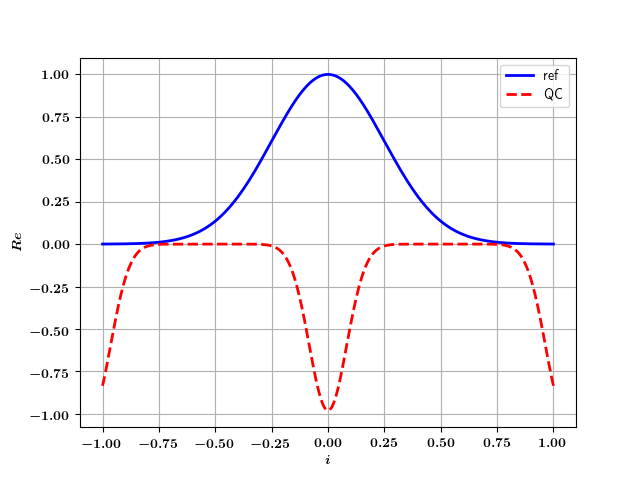

In [17]:
# -----------------------------------------------------------
# --- Read results from QuCF simulations ---
# -----------------------------------------------------------
mix.reload_module(mse)


om = mse.MeasOracle__(True)

om.path_  = path_data_
om.pname_ = pr_name_
om.open()
om.read_qsvt()
om.set_zero_ancillae_work_states(0)
qc_data = om.get_var_x({}, "rx")

# reference data:
x = np.linspace(-alpha_k0, alpha_k0, Nx_)

y = np.sin(x)
ref_data = np.exp(- np.arcsin(y)**2 / (2 * om.dd_["qetu_data"]["par"]**2))
# ref_data = np.exp(-1j * np.cos(x)) 
# ref_data /= np.sqrt( np.sum( np.abs(ref_data)**2 ) )



# --- Plottging: Re ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    x, ref_data.real, 
    color='b', linewidth = 2, linestyle='-',  
    label = "ref"
)
ax.plot(
    x, qc_data.real * 2**(nx_/2), 
#     x, -qc_data.real, 
    color='r', linewidth = 2, linestyle='--',  
    label = "QC"
)
plt.xlabel('$i$')
plt.ylabel("$Re$")
ax.legend()
plt.grid(True)
plt.show()

In [15]:
np.sqrt( np.sum( np.abs(qc_data)**2 ) )

0.31863094574033063

In [6]:
np.sqrt( np.sum( np.abs(ref_data)**2 ) )

31.99991450013406